1.What is Detectron2 and how does it differ from previous object detection
frameworks?

Ans- Detectron2 is modular library for object detection, instance segmentation, and panoptic segmentation.

PyTorch Integration: Unlike the original Detectron (Caffe2), it uses PyTorch's dynamic graphs, making it easier to debug and customize.

Modularity: Features a "plug-and-play" design where users can easily swap backbones, ROI heads, and datasets.

Expanded Capabilities: Supports advanced tasks like Panoptic Segmentation (combining stuff and things) and DensePose (mapping pixels to 3D human body surfaces).

Speed: Highly optimized C++/CUDA implementations make it significantly faster for both training and inference.

Standardization: Uses a unified configuration system (fvcore) and a central Model Zoo for pre-trained weights.

2.Explain the process and importance of data annotation when working with
Detectron2.

Ans- **Data Annotation Process**

Labeling: Use tools (e.g., CVAT, Labelme) to draw bounding boxes or polygons around objects.

Formatting: Export labels into COCO JSON format, the standard for Detectron2.

Registration: Use DatasetCatalog.register to link the images and JSON metadata to the framework.

**Importance in Detectron2**

Ground Truth: Provides the "correct answers" the model uses to calculate loss and learn features.

Pixel Precision: High-quality masks are essential for Instance Segmentation (Mask R-CNN) to distinguish overlapping objects.

Performance: Poor or "loose" annotations directly lower the mAP (Mean Average Precision) score.

Class Balance: Ensures the model recognizes rare objects by providing enough labeled examples.

3.Describe the steps involved in training a custom object detection model
using Detectron2.

Ans- 1. Data Annotation: Label your images with bounding boxes or polygons and export them in COCO JSON format.

2. Registration: Register your dataset and its metadata so Detectron2 can locate the files.

from detectron2.data.datasets

import register_coco_instances
register_coco_instances("my_dataset", {}, "annotations.json", "image_dir")

3. Configuration Setup: Select a pre-trained model from the Model Zoo (e.g., Faster R-CNN or Mask R-CNN) and load its default configuration.

4. Hyperparameter Tuning: Adjust parameters like BASE_LR (learning rate), BATCH_SIZE, and NUM_CLASSES to match your specific dataset.

5. Training: Initialize the DefaultTrainer and start the training loop.

trainer = DefaultTrainer(cfg)

trainer.train()

6. Evaluation: Use the COCOEvaluator to check performance metrics like mAP (Mean Average Precision).

4.What are evaluation curves in Detectron2, and how are metrics like mAP
and IoU interpreted?

Ans- Detectron2 uses TensorBoard to visualize performance during training. Key curves include:

Total Loss Curve: Should steadily decrease; a sudden spike indicates instability, while a flat line suggests the model has stopped learning.

Classification Loss: Measures how well the model identifies the type of object.

Box Regression Loss: Measures how well the model draws the bounding box.

Precision-Recall (PR) Curve: Plots precision against recall. A larger area under this curve (AUC) signifies a more robust model.

**Evaluation Metrics in Detectron2**

1. IoU (Intersection over Union)

Definition: Measures the overlap between the Predicted Bounding Box and the Ground Truth Bounding Box.

Formula: 2$\text{IoU} = \frac{\text{Area of Overlap}}{\text{Area of Union}}$

Interpretation: * IoU > 0.5: Generally considered a "true positive."IoU = 1.0: Perfect overlap.

2. mAP (Mean Average Precision)

Definition: The primary metric for object detection; it is the average of Precision calculated across all classes and multiple IoU thresholds (usually from 0.5 to 0.95).

Interpretation:

AP50: Accuracy when a 50% overlap is required.

AP75: Accuracy when a 75% overlap is required (stricter).

Higher mAP: Indicates the model is better at both finding objects and localizing them accurately.

5.Compare Detectron2 and TFOD2 in terms of features, performance, and
ease of use.

Ans-**Backend**: Detectron2 is built on PyTorch; TFOD2 is built on TensorFlow 2.x.

**Architecture**: Detectron2 uses a modular library design for easy custom code integration; TFOD2 uses a framework approach based on Protobuf configurations.

**Learning Curve**: Detectron2 is generally easier for developers due to standard Pythonic debugging; TFOD2 is steeper due to rigid configuration files.

**Training Speed**: Detectron2 is typically faster for training and research iteration; TFOD2 is optimized for distributed training at massive scales.

**Deployment**: TFOD2 has superior support for mobile and edge devices (TFLite, TFJS); Detectron2 uses TorchScript for production but is less native to mobile.

**Task Variety**: Detectron2 excels in Panoptic Segmentation and DensePose; TFOD2 offers broader support for SSD and EfficientDet models.

**Documentation**: Detectron2 has cleaner API docs; TFOD2 has more deployment tutorials but fragmented API documentation.

6.Write Python code to install Detectron2 and verify the installation.

In [20]:
# 1. Install Detectron2 and dependencies
# We install from source to match the current Colab PyTorch/CUDA version automatically.
# This may take 1-3 minutes to compile.
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# 2. Verify Installation
import torch, detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

print("-" * 30)
print(f"Detectron2 Version: {detectron2.__version__}")
print(f"PyTorch Version:    {torch.__version__}")
print(f"CUDA Available:     {torch.cuda.is_available()}")
print(f"Device Name:        {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")
print("-" * 30)

if torch.cuda.is_available():
    print("✅ Success! Detectron2 is installed and seeing the GPU.")
else:
    print("⚠️ Detectron2 installed, but GPU is not detected. Go to Runtime > Change runtime type > GPU.")

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-z6ooqzl6
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-z6ooqzl6
  Resolved https://github.com/facebookresearch/detectron2.git to commit fd27788985af0f4ca800bca563acdb700bb890e2
  Preparing metadata (setup.py) ... done
------------------------------
Detectron2 Version: 0.6
PyTorch Version:    2.9.0+cu126
CUDA Available:     True
Device Name:        Tesla T4
------------------------------
✅ Success! Detectron2 is installed and seeing the GPU.


7.Annotate a dataset using any tool of your choice and convert the annotations to COCO format for Detectron2.

🆕 Created fresh dataset name: my_dataset_3952
🔍 Searching for 'images.jfif'...
✅ Found files in: /content/sample_data/Object Detection/
✅ JSON converted successfully.
🚀 Starting training...
[01/19 18:00:12 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
      

model_final_280758.pkl: 167MB [00:01, 143MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[01/19 18:00:14 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
W0119 18:00:17.270000 195 torch/fx/_symbolic_trace.py:52] is_fx_tracing will return true for both fx.symbolic_trace and torch.export. Please use is_fx_tracing_symbolic_tracing() for specifically fx.symbolic_trace or torch.compiler.is_compiling() for specifically torch.export/compile.


[01/19 18:00:23 d2.utils.events]:  eta: 0:01:20  iter: 19  total_loss: 2.596  loss_cls: 1.654  loss_box_reg: 0.9196  loss_rpn_cls: 0.01097  loss_rpn_loc: 0.02306    time: 0.2899  last_time: 0.2863  data_time: 0.0136  last_data_time: 0.0052   lr: 1.6068e-05  max_mem: 1660M
[01/19 18:00:36 d2.utils.events]:  eta: 0:01:15  iter: 39  total_loss: 2.312  loss_cls: 1.395  loss_box_reg: 0.8909  loss_rpn_cls: 0.009322  loss_rpn_loc: 0.022    time: 0.2942  last_time: 0.3019  data_time: 0.0063  last_data_time: 0.0054   lr: 3.2718e-05  max_mem: 1660M
[01/19 18:00:42 d2.utils.events]:  eta: 0:01:09  iter: 59  total_loss: 1.889  loss_cls: 0.9721  loss_box_reg: 0.8819  loss_rpn_cls: 0.00618  loss_rpn_loc: 0.0191    time: 0.2951  last_time: 0.2922  data_time: 0.0066  last_data_time: 0.0048   lr: 4.9367e-05  max_mem: 1660M
[01/19 18:00:48 d2.utils.events]:  eta: 0:01:04  iter: 79  total_loss: 1.64  loss_cls: 0.7395  loss_box_reg: 0.8762  loss_rpn_cls: 0.008741  loss_rpn_loc: 0.01462    time: 0.2949  la

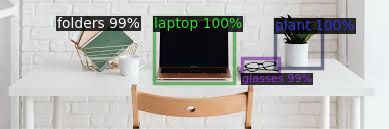

In [34]:
import random
import os
import json
import cv2
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo

# ==========================================
# 1. YOUR CLASSES
# (I am using the list you showed in your last error message.
#  If this is wrong, change the names inside the brackets below).
category_list = ['folders', 'laptop', 'glasses', 'plant']
# ==========================================

# 2. AUTO-FIX & SETUP
# Generate a random name to ensure a fresh start
dataset_name = f"my_dataset_{random.randint(1000, 9999)}"
print(f"🆕 Created fresh dataset name: {dataset_name}")

# Auto-detect path for 'images.jfif'
dataset_path = None
target_file = "images.jfif"  # <--- UPDATED to match your file

print(f"🔍 Searching for '{target_file}'...")
for root, dirs, files in os.walk("/content/"):
    if target_file in files:
        dataset_path = root + "/"
        print(f"✅ Found files in: {dataset_path}")
        break

if not dataset_path:
    print("❌ Error: Could not find 'images.jfif'.")
    print("👉 Please ensure you uploaded 'images.jfif' and 'images.txt'.")
else:
    output_json_name = os.path.join(dataset_path, "output_coco.json")

    # 3. CONVERT YOLO TO COCO
    def yolo_to_coco(d_path, json_out, cats):
        images = []
        annotations = []
        img_id = 0
        ann_id = 0
        coco_cats = [{"id": i, "name": n, "supercategory": ""} for i, n in enumerate(cats)]

        files = [f for f in os.listdir(d_path) if f.lower().endswith(('.jpg', '.png', '.jpeg', '.jfif'))]

        for file_name in files:
            img = cv2.imread(os.path.join(d_path, file_name))
            if img is None: continue
            h, w, _ = img.shape
            images.append({"id": img_id, "file_name": file_name, "height": h, "width": w})

            # This will automatically look for images.txt since file_name is images.jfif
            txt_file = os.path.join(d_path, os.path.splitext(file_name)[0] + ".txt")

            if os.path.exists(txt_file):
                with open(txt_file) as f:
                    for line in f:
                        parts = line.strip().split()
                        if len(parts) >= 5:
                            cls_id = int(parts[0])
                            nx, ny, nw, nh = map(float, parts[1:])
                            x = (nx * w) - (nw * w / 2)
                            y = (ny * h) - (nh * h / 2)
                            annotations.append({
                                "id": ann_id, "image_id": img_id, "category_id": cls_id,
                                "bbox": [x, y, nw*w, nh*h], "area": (nw*w)*(nh*h),
                                "iscrowd": 0, "segmentation": []
                            })
                            ann_id += 1
            else:
                 print(f"⚠️ Warning: Found image '{file_name}' but NO matching text file '{txt_file}'")
            img_id += 1

        with open(json_out, 'w') as f:
            json.dump({"images": images, "annotations": annotations, "categories": coco_cats}, f)
        print("✅ JSON converted successfully.")

    yolo_to_coco(dataset_path, output_json_name, category_list)

    # 4. REGISTER
    register_coco_instances(dataset_name, {}, output_json_name, dataset_path)

    # 5. CONFIGURE TRAINING
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
    cfg.DATASETS.TRAIN = (dataset_name,)
    cfg.DATASETS.TEST = ()
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025
    cfg.SOLVER.MAX_ITER = 300
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(category_list)
    cfg.OUTPUT_DIR = "./output"
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

    # 6. START TRAINING
    print("🚀 Starting training...")
    trainer = DefaultTrainer(cfg)
    trainer.resume_or_load(resume=False)
    trainer.train()

    # 7. VISUALIZE RESULT
    from detectron2.engine import DefaultPredictor
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
    predictor = DefaultPredictor(cfg)

    # Use 'target_file' (images.jfif) for visualization
    im_path = os.path.join(dataset_path, target_file)
    im = cv2.imread(im_path)
    if im is not None:
        outputs = predictor(im)
        v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(dataset_name), scale=1.0)
        out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        cv2_imshow(out.get_image()[:, :, ::-1])
    else:
        print(f"❌ Error: Could not read image at {im_path} for visualization.")

8.Write a script to download pretrained weights and configure paths for training in Detectron2.

In [35]:
import os
from detectron2.config import get_cfg
from detectron2 import model_zoo

# 1. Initialize Configuration
cfg = get_cfg()

# 2. Select Architecture
# This loads the config structure for Faster R-CNN (ResNet-50 backbone)
config_file = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
cfg.merge_from_file(model_zoo.get_config_file(config_file))

# 3. Download & Configure Weights
# This single line checks if you have the weights.
# If not, it DOWNLOADS them to your local cache automatically.
print("📥 Checking/Downloading pretrained weights...")
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(config_file)

# 4. Configure Output Path
# This is where your custom trained model will be saved
cfg.OUTPUT_DIR = "./output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# 5. Verify
print("-" * 30)
print(f"✅ Architecture: {config_file}")
print(f"✅ Weights URL:  {cfg.MODEL.WEIGHTS}")
print(f"✅ Output Dir:   {cfg.OUTPUT_DIR}")
print("-" * 30)

📥 Checking/Downloading pretrained weights...
------------------------------
✅ Architecture: COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml
✅ Weights URL:  https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl
✅ Output Dir:   ./output
------------------------------


9.Show the steps and code to run inference using a trained Detectron2
model on a new image.

Update Weights Path: Point the config to your newly trained model_final.pth.

Set Threshold: Define a confidence threshold (e.g., 0.5) to filter weak predictions.

Initialize Predictor: Create the DefaultPredictor object.

Run Prediction: Pass your image (loaded via OpenCV) to the predictor.

Visualize: Draw the resulting bounding boxes on the image.

[01/19 18:05:48 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


🔍 Searching for 'images.jfif'...
✅ Found image at: /content/sample_data/Object Detection/images.jfif


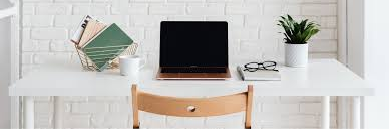

In [37]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.engine import DefaultPredictor
from google.colab.patches import cv2_imshow
import cv2
import os

# 1. SETUP CONFIG (Ensure weights are loaded)
# We assume 'cfg' is already defined from your training step.
# If not, you'd need to re-run the config block.
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)

# 2. FIND YOUR IMAGE AUTOMATICALLY
target_image = "images.jfif"
image_path = None

print(f"🔍 Searching for '{target_image}'...")
for root, dirs, files in os.walk("/content/"):
    if target_image in files:
        image_path = os.path.join(root, target_image)
        print(f"✅ Found image at: {image_path}")
        break

# 3. RUN PREDICTION
if image_path:
    im = cv2.imread(image_path)

    if im is not None:
        # Predict
        outputs = predictor(im)

        # Visualize
        # Note: We use the dataset_name variable you created earlier
        # (e.g., "my_dataset_1234") to get the correct class names.
        # If that variable is lost, we look at the training config.
        train_dataset_name = cfg.DATASETS.TRAIN[0]
        metadata = MetadataCatalog.get(train_dataset_name)

        v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=1.0)
        out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

        cv2_imshow(out.get_image()[:, :, ::-1])
    else:
        print("❌ Error: cv2 failed to load the image (it might be corrupted).")
else:
    print(f"❌ Error: Could not find '{target_image}' anywhere in the folder.")

10.You are assigned to build a wildlife monitoring system to detect and track
different animal species in a forest using Detectron2. Describe the end-to-end pipeline from data collection to deploying the model, and how you would handle challenges like occlusion or nighttime detection.

**Phase 1: Data Collection & Preparation**

**Data Acquisition (Camera Traps):**

Deploy motion-triggered cameras (RGB + Infrared) across the forest.

Data Format: Images (JPG) and short video clips (MP4).

Metadata: Timestamp, GPS coordinates, temperature (critical for distinguishing false positives from wind/leaves).

**Annotation Strategy:**

Tool: Use CVAT or LabelImg (as you did with MakeSense.ai) to draw bounding boxes.

Class Imbalance: Predators (tigers, leopards) will be rare; prey (deer) will be abundant.

Handling: Use Active Learning—train a small model, run it on unlabeled data, and only manually correct the low-confidence predictions to speed up labeling.

**Data Preprocessing (The "ETL" of Vision):**

Conversion: Convert annotations to COCO JSON format (the script we wrote previously).

Splitting: Stratified split (Train 70% / Val 20% / Test 10%) to ensure rare species exist in all sets.

**Phase 2: Model Architecture & Training (Detectron2)**

**Model Selection:**

Architecture: Use Faster R-CNN with ResNet-50-FPN.

It offers the best balance of accuracy and speed for static images. If deploying on edge devices (like a Raspberry Pi in the forest), switch to RetinaNet or MobileNet backbone for lower latency.

**Configuration (Hyperparameters):**

Anchor Box Tuning: Animals vary vastly in size (elephant vs. rabbit). Modify RPN.ANCHOR_SIZES in the config to cover this range.

Data Augmentation: Apply random brightness/contrast (to simulate lighting changes) and horizontal flips.

**Training Strategy:**

Transfer Learning: Initialize with weights pre-trained on the COCO dataset (transferring knowledge of generic objects/shapes).

Frozen Backbone: Freeze the bottom layers (backbone) initially to train only the heads, then unfreeze for fine-tuning.

**Phase 3: Handling Specific Challenges**

This is the "Senior Analyst" part of the answer—addressing edge cases.

**Challenge 1: Occlusion (Animals behind trees)**

Solution: Use Soft-NMS (Non-Maximum Suppression). Standard NMS deletes bounding boxes that overlap heavily. Soft-NMS lowers their score instead, allowing detection of a cub standing right next to its mother.

Data Augmentation: Use "CutOut" or "MixUp" augmentation during training—artificially pasting black patches on images to force the model to recognize animals by partial features (e.g., recognizing a deer by just its antlers).

**Challenge 2: Nighttime Detection (Infrared Images)**

Problem: IR images are grayscale and lack color features.

Solution:

Domain Adaptation: If you only have daytime labeled data, use GANs (Generative Adversarial Networks) to style-transfer daytime images into "fake" nighttime images to augment training.

Grayscale Conversion: During training, randomly convert 50% of daytime RGB images to grayscale so the model learns to rely on shape/texture rather than color.

**Phase 4: Deployment Pipeline**

**Inference Engine:**

Export the trained model to TorchScript or ONNX format for faster inference.

Deploy on an edge device (e.g., NVIDIA Jetson Nano) attached to the camera trap.

**Post-Processing Logic:**

Confidence Thresholding: IF score > 0.85 THEN trigger_alert.

Temporal Consistency (Tracking): If a "Tiger" is detected in Frame 1, 2, and 4, but missing in Frame 3, use a Kalman Filter or SORT (Simple Online and Realtime Tracking) algorithm to smooth the trajectory and count unique animals effectively.

**Reporting (Power BI/SQL Skills):**

Push detection logs (Species, Time, LocationID) to an Azure SQL Database.

Connect Power BI to visualize:

Activity Heatmaps (Where are tigers most active?)

Temporal Trends (Are elephants migrating earlier this year?)